## Project: Heart Disease Prediction

The cardivascular Death are the major cause of Death Globally reasulting approxmately in to 30% of the total Deaths. According the the survey 90 % of these can be prevented.

The Objective of this Project is to take a closer look at the data and to predict the chance of occurance based on the various features (Risk Factors) responsible for the Disease.

Accordingly calculate the Insurance Premium for the following candidate.

The Data set used here is taken from UCI ML Repository [Data Set](http://archive.ics.uci.edu/ml/datasets/Heart+Disease). 

Project Overview:
1. Data Set Structure.
2. Data Cleaning.
3. Applying Machine Learning Algorithms 
4. Conclusion 

We will predidict using 2 Algorithms Linear Regression and Random Forest, compare their accuracy and will conclude which one is the best among these 2.


## 1. Data Set Structure

The Data Set used in this project consists of 14 Different Feature (Risk Factors) which describe the condition of the person. Based on this 14 Features we classify the person in to 5 differnet stages (Values 0, 1, 2, 3, 4) value 0 represents the absence of the disease and other values according to the risk factors (Higher value represents Higher risk)

### Features:

- age - age in years
- sex - sex(1 = male; 0 = female)
- chest_pain - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- blood_pressure - resting blood pressure (in mm Hg on admission to the hospital)
- serum_cholestoral - serum cholestoral in mg/dl
- fasting_blood_sugar - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- electrocardiographic - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
- max_heart_rate - maximum heart rate achieved
- induced_angina - exercise induced angina (1 = yes; 0 = no)
- ST_depression - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
- no_of_vessels - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- diagnosis - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)



### Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

### Data Input

In [29]:
# column names are insearted for the Description purpose 
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

df = pd.read_csv("processed.cleveland.data", names=col_names, header=None, na_values="?")

print("Records: {}\nVariables: {}".format(df.shape[0], df.shape[1]))

df.head()

Records: 303
Variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [30]:
# Detailed information About Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                     303 non-null float64
sex                     303 non-null float64
chest_pain              303 non-null float64
blood_pressure          303 non-null float64
serum_cholestoral       303 non-null float64
fasting_blood_sugar     303 non-null float64
electrocardiographic    303 non-null float64
max_heart_rate          303 non-null float64
induced_angina          303 non-null float64
ST_depression           303 non-null float64
slope                   303 non-null float64
no_of_vessels           299 non-null float64
thal                    301 non-null float64
diagnosis               303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


From the above Description we can tell that there are 6 missing values in this dataset and all variables are recognized as numeric. 

But from dataset description, we know that most of features are categorical and it's necessary to distinguish them accordingly.

## 2. Data Cleaning 

In [31]:
# Separates the Numeric and Categorical Columns 
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)

['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


Since the values 1-4 indicate that a disease is present, it's reasonable to pull them together.

In [32]:
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

### Numeric Columns

Let's take a look at the 5 Numeric Columns we have and their Characteristics.

In [33]:
df[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.693069,149.607261,54.438944,131.689769,1.039604
std,51.776918,22.875003,9.038662,17.599748,1.161075
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,48.000000,120.000000,0.000000
50%,241.000000,153.000000,56.000000,130.000000,0.800000
75%,275.000000,166.000000,61.000000,140.000000,1.600000
max,564.000000,202.000000,77.000000,200.000000,6.200000


### Categorial Columns 

Let's take a closer look at categorical variables and see how they impact our target. 

In [34]:
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

In [35]:
df[['no_of_vessels','diagnosis']].groupby('no_of_vessels').mean()

,diagnosis
no_of_vessels,
0.0,0.261364
1.0,0.676923
2.0,0.815789
3.0,0.850000


In [36]:
df.groupby(['fasting_blood_sugar','diagnosis'])['fasting_blood_sugar'].count()

fasting_blood_sugar  diagnosis
0.0                  0            141
                     1            117
1.0                  0             23
                     1             22
Name: fasting_blood_sugar, dtype: int64

In [37]:
df.groupby(['electrocardiographic','diagnosis'])['electrocardiographic'].count()

electrocardiographic  diagnosis
0.0                   0            95
                      1            56
1.0                   0             1
                      1             3
2.0                   0            68
                      1            80
Name: electrocardiographic, dtype: int64

In [38]:
df.groupby(['induced_angina','diagnosis'])['induced_angina'].count()

induced_angina  diagnosis
0.0             0            141
                1             63
1.0             0             23
                1             76
Name: induced_angina, dtype: int64

In [39]:
df.groupby(['slope','diagnosis'])['slope'].count()

slope  diagnosis
1.0    0            106
       1             36
2.0    0             49
       1             91
3.0    0              9
       1             12
Name: slope, dtype: int64

In [40]:
df.groupby(['no_of_vessels','diagnosis'])['no_of_vessels'].count()

no_of_vessels  diagnosis
0.0            0            130
               1             46
1.0            0             21
               1             44
2.0            0              7
               1             31
3.0            0              3
               1             17
Name: no_of_vessels, dtype: int64

In [41]:
df.groupby(['thal','diagnosis'])['thal'].count()

thal  diagnosis
3.0   0            129
      1             37
6.0   0              6
      1             12
7.0   0             28
      1             89
Name: thal, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


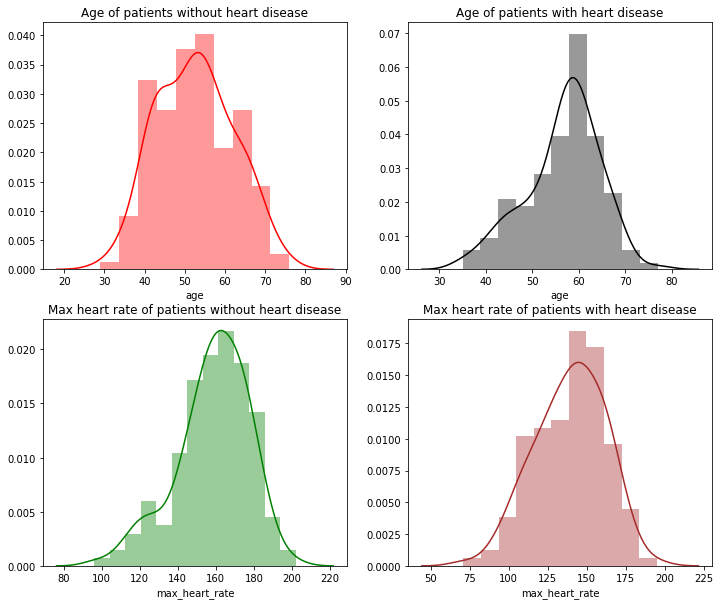

In [42]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age, color="red")
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].age, color="black")
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].max_heart_rate, color="green")
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['diagnosis']==1].max_heart_rate, color="brown")
plt.title('Max heart rate of patients with heart disease')
plt.show()

In order to make our dataset compatible with machine learning algorithms contained in Sci-kit Learn library, we need to handle all missing data.

There are many options we could consider when replacing a missing value, for example:
- A constant value such as 0, distinct from other values
- Random Value from the dataset
- A mean, median or mode of the corresponding value
- An estimated value

In [43]:
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

From the above information we can tell that there are in total 6 empty values. Both are Categorial Feature, so will replace it with the mode of the value.

In [44]:
df['no_of_vessels'].fillna(df['no_of_vessels'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

Now its time to separate the Target Variable.

In [45]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

Now will separate the Test Data and Train Data. Will keep 40% of the data for Testing purpose and rest for training purpose.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)

Now, will stadardize and Normalyze the Data. So the whole Data will be with respect the Standard Deviation of each feature.  

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Machine Learning Algorithms

The main final goal of the study is to predict the person with Disease with the highest accuracy possible. For that purpose we are implementing two different algorithms which gives us the results with different accuracy. We have chosen this two algorithms based on solving supervised learning problems. This shows us the best performing algorithm for this kind of problem.

Here we are using Scikit learn library and create a function which trains out models. To check whether our model is overfitting or underfitting we are showing accuracy on both train and test sets(which is also known as so-called bias/variance tradeoff).

In [48]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

## Logistic Regression

This method is a basic technique in statistical analysis which practicing to predict 
a data value based on previous observations. This algorithm gives the relationship 
between a dependent variable and one or more dependent variable.

In [49]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 85.85%
Test accuracy: 85.71%


### Random Forests

Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.



Train accuracy: 99.06%
Test accuracy: 83.52%


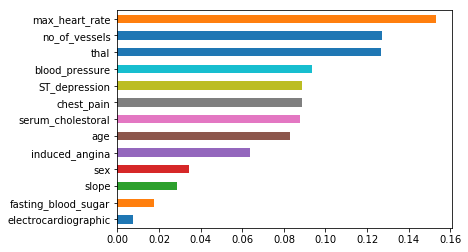

In [50]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

### Altering 'n_estimator'

In [51]:
# tuned Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=2606)

Train accuracy: 100.00%
Test accuracy: 89.01%


## 4. Conclusion

The perpose of the project was corelate two different algorithms. Which gives us an opourtunity to  predict if the patient, having various personal characteristics and symptoms, will get Heart Disease or not. Final Results are as shown in below.

In [52]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['Logistic Regression', 'Random Forests']

# list of algorithms with parameters
models = [LogisticRegression(), RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [53]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
Logistic Regression,0.857143
Random Forests,0.890110


As we can see from the above result that random forest model has performed very well compare to linear regression. In this project we can say that in machine learning problems data processing and tuning makes the model more accurate and efficient compare to non processed data. It also makes simple models quite accurate.

This results show us that  machine learning is having a good impact on the future of medical treatment based on patients data. Having such information makes a patients and doctors life much easier than before.